In [1]:
%cd "D:\Reccomandation System\ml-latest-small"

D:\Reccomandation System\ml-latest-small


In [2]:
import numpy as np
import pandas as pd

In [3]:
movie_titles = pd.read_csv("movies.csv")
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
final_movie_df = pd.merge(ratings,movie_titles,on='movieId')
final_movie_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [9]:
final_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [10]:
final_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [11]:
#working with movie ratings
ratings_df = pd.DataFrame(final_movie_df.groupby('title')['rating'].mean())
ratings_df.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [31]:
ratings_df = pd.DataFrame(final_movie_df.groupby('title')['rating'].sum())
ratings_df.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),7.0
'Salem's Lot (2004),5.0
'Til There Was You (1997),8.0


In [12]:
ratings_df['num of ratings'] = pd.DataFrame(final_movie_df.groupby('title')['rating'].count())
ratings_df.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [33]:
df_user_1 = final_movie_df[(final_movie_df['userId'] == 1) & (final_movie_df['rating'] == 5)]
df_user_1 = df_user_1.set_index('movieId')
print(df_user_1)

         userId  rating  timestamp                                 title  \
movieId                                                                    
47            1     5.0  964983815           Seven (a.k.a. Se7en) (1995)   
50            1     5.0  964982931            Usual Suspects, The (1995)   
101           1     5.0  964980868                  Bottle Rocket (1996)   
151           1     5.0  964984041                        Rob Roy (1995)   
157           1     5.0  964984100                 Canadian Bacon (1995)   
...         ...     ...        ...                                   ...   
3702          1     5.0  964983737                        Mad Max (1979)   
3703          1     5.0  964981909  Road Warrior, The (Mad Max 2) (1981)   
3729          1     5.0  964982363                          Shaft (1971)   
3793          1     5.0  964981855                          X-Men (2000)   
5060          1     5.0  964984002          M*A*S*H (a.k.a. MASH) (1970)   

           

In [34]:
df_user_1_rating_4 = final_movie_df[(final_movie_df['userId'] == 1) & (final_movie_df['rating'] == 4)]
df_user_1_rating_4 = df_user_1_rating_4.set_index('movieId')
print(df_user_1_rating_4)

         userId  rating  timestamp                                title  \
movieId                                                                   
1             1     4.0  964982703                     Toy Story (1995)   
3             1     4.0  964981247              Grumpier Old Men (1995)   
6             1     4.0  964982224                          Heat (1995)   
110           1     4.0  964982176                    Braveheart (1995)   
235           1     4.0  964980908                       Ed Wood (1994)   
...         ...     ...        ...                                  ...   
3639          1     4.0  964982271  Man with the Golden Gun, The (1974)   
3740          1     4.0  964982417   Big Trouble in Little China (1986)   
3744          1     4.0  964980694                         Shaft (2000)   
3809          1     4.0  964981220               What About Bob? (1991)   
4006          1     4.0  964982903       Transformers: The Movie (1986)   

                        

In [35]:
df_user_15_rating_5 = final_movie_df[(final_movie_df['userId'] == 15) & (final_movie_df['rating'] == 5)]
df_user_15_rating_5 = df_user_15_rating_5.set_index('movieId')
print(df_user_15_rating_5)

         userId  rating   timestamp  \
movieId                               
260          15     5.0  1510571946   
356          15     5.0  1510571873   
527          15     5.0  1510571982   
1196         15     5.0  1510572645   
1210         15     5.0  1510572653   
1214         15     5.0  1510572684   
1270         15     5.0  1510571953   
3147         15     5.0  1510571797   
3578         15     5.0  1510571768   
318          15     5.0  1510571866   
2150         15     5.0  1299425040   
589          15     5.0  1510572012   
4995         15     5.0  1510571789   
5989         15     5.0  1510571938   
33493        15     5.0  1510572900   
2011         15     5.0  1510572060   
1200         15     5.0  1510572775   
2001         15     5.0  1299424826   
3156         15     5.0  1510573324   
3510         15     5.0  1299425097   
4720         15     5.0  1510571736   
84152        15     5.0  1510572834   
122886       15     5.0  1510572679   
152077       15     5.0  

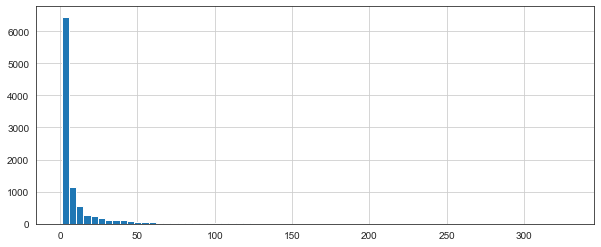

In [13]:
plt.figure(figsize=(10,4))
ratings_df['num of ratings'].hist(bins=70)

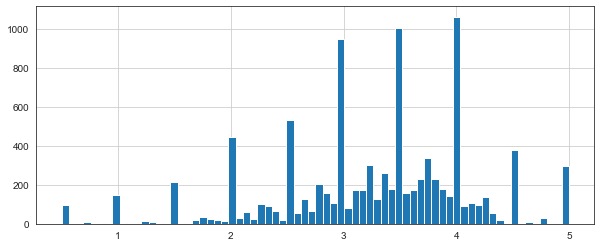

In [14]:
plt.figure(figsize=(10,4))
ratings_df['rating'].hist(bins=70)

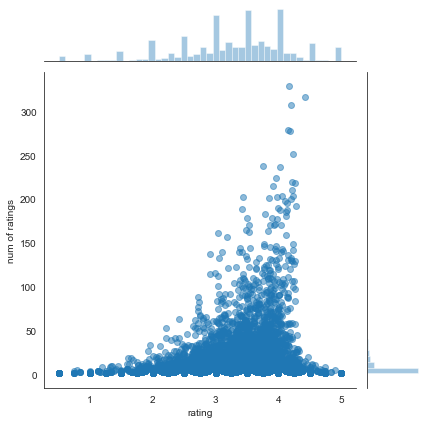

In [15]:
sns.jointplot(x='rating',y='num of ratings',data=ratings_df,alpha=0.5)

In [17]:
matrix_movie = final_movie_df.pivot_table(index='userId',columns='title',values='rating')
matrix_movie.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ratings_df.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [20]:
Pulp_Fiction_user_ratings = matrix_movie['Pulp Fiction (1994)']
Starwars_user_ratings = matrix_movie['Star Wars: Episode IV - A New Hope (1977)']
Starwars_user_ratings.head()

userId
1    5.0
2    NaN
3    NaN
4    5.0
5    NaN
Name: Star Wars: Episode IV - A New Hope (1977), dtype: float64

In [21]:
Pulp_Fiction_user_ratings.head()

userId
1    3.0
2    NaN
3    NaN
4    1.0
5    5.0
Name: Pulp Fiction (1994), dtype: float64

In [22]:
similar_to_starwars = matrix_movie.corrwith(Starwars_user_ratings)
similar_to_Pulp_Fiction = matrix_movie.corrwith(Pulp_Fiction_user_ratings)

C:\Users\veena\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\veena\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [23]:
correlated_to_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
correlated_to_starwars.dropna(inplace=True)
correlated_to_starwars.head()

,Correlation
title,
"'burbs, The (1989)",0.155161
(500) Days of Summer (2009),0.024299
*batteries not included (1987),-0.269069
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),0.360885


In [24]:
correlated_to_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Lakeview Terrace (2008),1.0
Cry_Wolf (a.k.a. Cry Wolf) (2005),1.0
Creep (2014),1.0
Non-Stop (2014),1.0
Not Without My Daughter (1991),1.0
Confessions of a Teenage Drama Queen (2004),1.0
Concussion (2015),1.0
Opera (1987),1.0
Our Hospitality (1923),1.0


In [25]:

correlated_to_starwars = correlated_to_starwars.join(ratings_df['num of ratings'])
correlated_to_starwars.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.155161,17
(500) Days of Summer (2009),0.024299,42
*batteries not included (1987),-0.269069,7
10 Cent Pistol (2015),1.000000,2
10 Cloverfield Lane (2016),0.360885,14


In [30]:
correlated_to_starwars[correlated_to_starwars['num of ratings']>100].sort_values('Correlation',ascending=False).head(15)

,Correlation,num of ratings
title,,
Star Wars: Episode IV - A New Hope (1977),1.000000,251
Star Wars: Episode V - The Empire Strikes Back (1980),0.777970,211
Star Wars: Episode VI - Return of the Jedi (1983),0.734230,196
"Fugitive, The (1993)",0.482078,190
Indiana Jones and the Last Crusade (1989),0.410916,140
"Lord of the Rings: The Return of the King, The (2003)",0.406602,185
Ghostbusters (a.k.a. Ghost Busters) (1984),0.391613,120
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981),0.384779,200
"Godfather, The (1972)",0.365920,192


In [27]:
correlated_to_Pulp_Fiction = pd.DataFrame(similar_to_Pulp_Fiction,columns=['Correlation'])
correlated_to_Pulp_Fiction.dropna(inplace=True)
correlated_to_Pulp_Fiction = correlated_to_Pulp_Fiction.join(ratings_df['num of ratings'])
correlated_to_Pulp_Fiction[correlated_to_Pulp_Fiction['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Trainspotting (1996),0.437714,102
Kill Bill: Vol. 2 (2004),0.421685,110


In [29]:
final_movie_df.to_csv("movies_recc.csv")